In [3]:
# !pip install seaborn

In [1]:
### import pandas
from matplotlib import rcParams
import requests
import json
import seaborn as sns
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
import networkx as nx
import hashlib
import os
from operator import itemgetter
import pandas

rcParams['figure.figsize'] = 11.7,8.27

def pretty_json(json_object):
    print(json.dumps(json_object, indent=2))

In [2]:
import time
from random import randrange, uniform
time.sleep(uniform(0, 10))
print(uniform(0, 10))
print('oio')

9.179444630938875
oio


In [3]:
api_key = "lU8aSNb6LfdjtnCiMQWxAqE5mvYXhrIH"
# with open ("apikey.txt", "r") as apikey_file:
#     api_key=apikey_file.readlines()[0].strip()
api_endpoint = "https://api.core.ac.uk/v3/"

In [4]:
def get_entity(url_fragment):
    headers={"Authorization":"Bearer "+api_key}
    response = requests.get(api_endpoint + url_fragment, headers=headers)
    if response.status_code == 200:
        return response.json(), response.elapsed.total_seconds()
    else:
        print(f"Error code {response.status_code}, {response.content}")

In [5]:
def query_api(url_fragment, query,limit=100):
    headers={"Authorization":"Bearer "+api_key}
    query = {"q":query, "limit":limit}
    response = requests.post(f"{api_endpoint}{url_fragment}",data = json.dumps(query), headers=headers)
    if response.status_code ==200:
        return response.json(), response.elapsed.total_seconds()
    else:
        print(f"Error code {response.status_code}, {response.content}")


In [6]:
# pandas.DataFrame(uk_data_providers_raw).to_json(f"{count}_{totalhits}.json", indent=4)

In [7]:
def query_api(url_fragment, query,is_scroll=False, limit=1, scrollId=None):
    headers={"Authorization":"Bearer "+api_key}
    query = {"q":query, "limit":limit}
    if not is_scroll:
        response = requests.post(f"{api_endpoint}{url_fragment}",data = json.dumps(query), headers=headers)
    elif not scrollId:
        query["scroll"]="true"
        response = requests.post(f"{api_endpoint}{url_fragment}",data = json.dumps(query),headers=headers)
    else:
        query["scrollId"]=scrollId
        response = requests.post(f"{api_endpoint}{url_fragment}",data = json.dumps(query),headers=headers)
    if response.status_code ==200:
        return response.json(), response.elapsed.total_seconds()
    else:
        print(f"Error code {response.status_code}, {response.content}")

def scroll(search_url, query, extract_info_callback=None):
    allresults = []
    count = 0
    scrollId=None
    while True:
        time.sleep(uniform(0, 10)*2)
        try:
            result, elapsed =query_api(search_url, query, is_scroll=True, scrollId=scrollId)
            scrollId=result["scrollId"]
            totalhits = result["totalHits"]
            result_size = len(result["results"])
            if result_size==0:
                break
            for hit in result["results"]:
                if extract_info_callback:
                  allresults.append(extract_info_callback(hit))
                else:
                  allresults.append(hit)
            count+=result_size
            print(f"{count}/{totalhits} {elapsed}s")
            df=pandas.DataFrame(allresults)
#             print('type os df is: ', type(df))
            with open(f"../../../../share_delta/BigOil/nethome/nilton/downloads_json_api_core/{count}_{totalhits}.json", "w",encoding='utf-8') as file:
                df.to_json(file,force_ascii=False )
#             df.to_json(f"{count}_{totalhits}.json", indent=4)
        except:
            print('error on query_api')
    return allresults, count, totalhits

In [11]:
def query_api(url_fragment, query,is_scroll=False, limit=100, scrollId=None, offSet=0):
    headers={"Authorization":"Bearer "+api_key}
    query = {"q":query, "limit":limit}
    if not is_scroll:
        response = requests.post(f"{api_endpoint}{url_fragment}",data = json.dumps(query), headers=headers)
    elif not scrollId:
#         print('aqui')
        query["scroll"]="true"
        response = requests.post(f"{api_endpoint}{url_fragment}",data = json.dumps(query),headers=headers)
    else:
        query["scrollId"]=scrollId
        query["offset"]=offSet
        response = requests.post(f"{api_endpoint}{url_fragment}",data = json.dumps(query),headers=headers)
    if response.status_code ==200:
        return response.json(), response.elapsed.total_seconds()
    else:
        print(f"Error code {response.status_code}, {response.content}")

In [16]:
scrol= "DnF1ZXJ5VGhlbkZldGNoCgAAAAAA1RWHFnBEbW03a2NBUzZTSXkydFFXR09HdEEAAAAAAWMr8xZkdk1wMmgxQ1RSMnB0UmdIbUxrZmJRAAAAAAFNkRAWSGdWZHIza3pReVdVNTRBZXlBel8tdwAAAAABVA2vFjVveHd5UlhIU2ptY2ZYSVRUdW5VVkEAAAAAAWSmXhZ0NGlKeXlxNVJudXFNT0Fqd0tnUzdBAAAAAADF0gcWUmpiWDlKTFNTU2V6Yl9WZ1B6Q1F1ZwAAAAABfLvPFkMwR1RPbjZhUmwtUFZyeDhIaUE0RFEAAAAAAXsNJBZnSnp2OU92elFONmlJZmJ6LVdHZzdnAAAAAAF1kUQWbW1Wdl9QWXBRenlodXlneVdHdzh5dwAAAAABAU36FnJWaDR4aVBjUS1XNVY3MWxDMHlxUVE="


In [21]:
scrol2= "'DnF1ZXJ5VGhlbkZldGNoCgAAAAAA1T44FnBEbW03a2NBUzZTSXkydFFXR09HdEEAAAAAAWN5MhZkdk1wMmgxQ1RSMnB0UmdIbUxrZmJRAAAAAAFN3oIWSGdWZHIza3pReVdVNTRBZXlBel8tdwAAAAABVFreFjVveHd5UlhIU2ptY2ZYSVRUdW5VVkEAAAAAAWTzlxZ0NGlKeXlxNVJudXFNT0Fqd0tnUzdBAAAAAADF-tgWUmpiWDlKTFNTU2V6Yl9WZ1B6Q1F1ZwAAAAABfQlBFkMwR1RPbjZhUmwtUFZyeDhIaUE0RFEAAAAAAXtaYxZnSnp2OU92elFONmlJZmJ6LVdHZzdnAAAAAAF13rwWbW1Wdl9QWXBRenlodXlneVdHdzh5dwAAAAABAXbeFnJWaDR4aVBjUS1XNVY3MWxDMHlxUVE='"

In [22]:
scrol == scrol2

False

In [20]:
s_url="search/works"
q = "'oil and gas' OR petroleum"
scrollId = None
# query["scrollId"]=scrollId
c=0
while c <2:
    c+=1
    try:
        result, elapsed = query_api(s_url, q, is_scroll=True, scrollId=scrollId,limit=3000, offSet=10)
        scrollId=result["scrollId"]
        print(scrollId)
        print(type(result))
        json_object = json.dumps(result, indent = 4) 
        with open("sample_3k_off_10_.json", "w") as outfile:
            outfile.write(json_object)
#         print(elapsed)
#         pretty_json(result)
       
    except:
        pass

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def get_data_providers_id(hit):
    return hit

uk_data_providers_raw, count, totalhits = scroll("search/works", "'oil and gas' OR petroleum", get_data_providers_id)
uk_data_providers = pandas.DataFrame(uk_data_providers_raw)
uk_data_providers

1/977806 17.957422s
2/977806 11.672998s
3/977806 1.773523s
4/977806 16.534055s
5/977806 1.692029s
6/977806 11.573752s
7/977806 11.574918s
8/977806 16.692571s
9/977806 1.644764s
Error code 429, b''
error on query_api
Error code 429, b''
error on query_api
Error code 429, b''
error on query_api
Error code 429, b''
error on query_api
Error code 429, b''
error on query_api
Error code 429, b''
error on query_api
Error code 429, b''
error on query_api
Error code 429, b''
error on query_api
error on query_api
Error code 429, b''
error on query_api


In [26]:
def aggregations(query, aggregation_fields,entity_type="works", limit=20, cache=True):
    headers={"Authorization":"Bearer "+api_key}

    query = {"q":query,"aggregations":aggregation_fields, "limit":limit}
    querystring = json.dumps(query).encode('utf-8')
    filename = f"{hashlib.md5(querystring).hexdigest()}.csv"
    responseObject = {}
    if cache and os.path.exists(filename):
        with open (filename, "r") as cached:
            responseObject=json.loads(cached.readlines()[0].strip())
    else:
        response = requests.post(f"{api_endpoint}search/{entity_type}/aggregate",data = json.dumps(query), headers=headers)
        responseObject = response.json()
        with open (filename, "w") as cached:
            cached.write(json.dumps(responseObject))
        
    return responseObject




{
  "aggregations": {
    "yearPublished": {
      "2016": 55965,
      "2015": 54357,
      "2017": 49908,
      "2014": 49140,
      "2018": 48319,
      "2013": 43982,
      "2019": 41244,
      "2012": 40404,
      "2011": 35791,
      "2020": 31480,
      "2010": 31113,
      "2009": 26900,
      "2008": 22903,
      "2021": 19675,
      "2007": 19649,
      "2006": 17013,
      "2005": 13978,
      "2004": 12288,
      "2003": 10442,
      "2002": 9241,
      "2001": 8215,
      "2000": 7814,
      "1999": 7298,
      "1998": 7064,
      "1996": 7010,
      "1997": 6797,
      "1995": 6624,
      "1994": 6322,
      "1992": 6071,
      "1991": 5931,
      "1990": 5906,
      "1993": 5815,
      "1980": 5802,
      "1979": 5468,
      "1981": 5407,
      "1989": 5316,
      "1988": 5268,
      "1982": 5147,
      "1986": 5060,
      "1987": 5056,
      "1984": 5007,
      "1983": 4976,
      "1978": 4846,
      "1977": 4820,
      "1985": 4602,
      "1974": 4470,
      "1975": 43

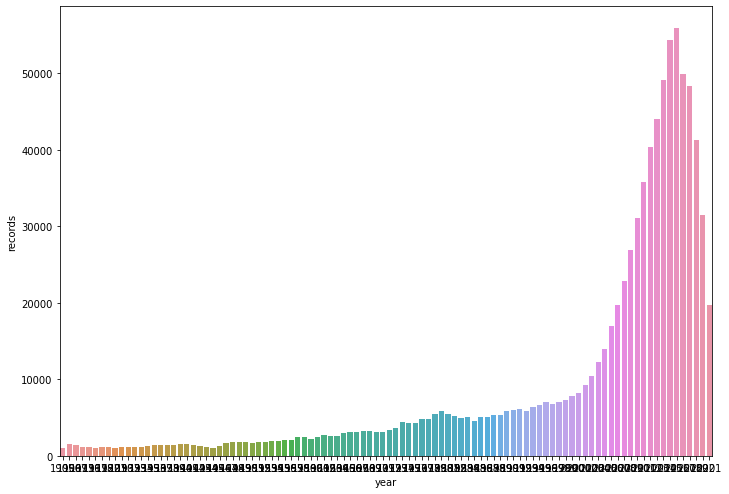

In [27]:
query = f"'oil and gas' OR petroleum"
aggregation_response = aggregations(query, aggregation_fields=["yearPublished"],entity_type="works", limit=20)
pretty_json(aggregation_response)
year_data = aggregation_response["aggregations"]["yearPublished"]
years = pandas.DataFrame(list(year_data.items()), columns=["year", "records"]) 
years = years.sort_values("year", ascending=True)
ax = sns.barplot(x="year", y="records", data=years)